In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forage-powerco-energy-provider-customer-churn/price_data.csv
/kaggle/input/forage-powerco-energy-provider-customer-churn/client_data.csv


In [2]:
# Load datasets
customer_data = pd.read_csv('/kaggle/input/forage-powerco-energy-provider-customer-churn/client_data.csv')
pricing_data = pd.read_csv('/kaggle/input/forage-powerco-energy-provider-customer-churn/price_data.csv')

# Display the first few rows of each dataset
print("Customer Data:")
print(customer_data.head())
print("\nPricing Data:")
print(pricing_data.head())


Customer Data:
                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.0

In [3]:
# Check data types
print("\nData Types of Customer Data:")
print(customer_data.dtypes)
print("\nData Types of Pricing Data:")
print(pricing_data.dtypes)



Data Types of Customer Data:
id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
orig

In [4]:
# Descriptive statistics for customer data
print("\nDescriptive Statistics of Customer Data:")
print(customer_data.describe(include='all'))

# Descriptive statistics for pricing data
print("\nDescriptive Statistics of Pricing Data:")
print(pricing_data.describe(include='all'))



Descriptive Statistics of Customer Data:
                                      id                     channel_sales  \
count                              14606                             14606   
unique                             14606                                 8   
top     24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
freq                                   1                              6754   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

            cons_12m 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


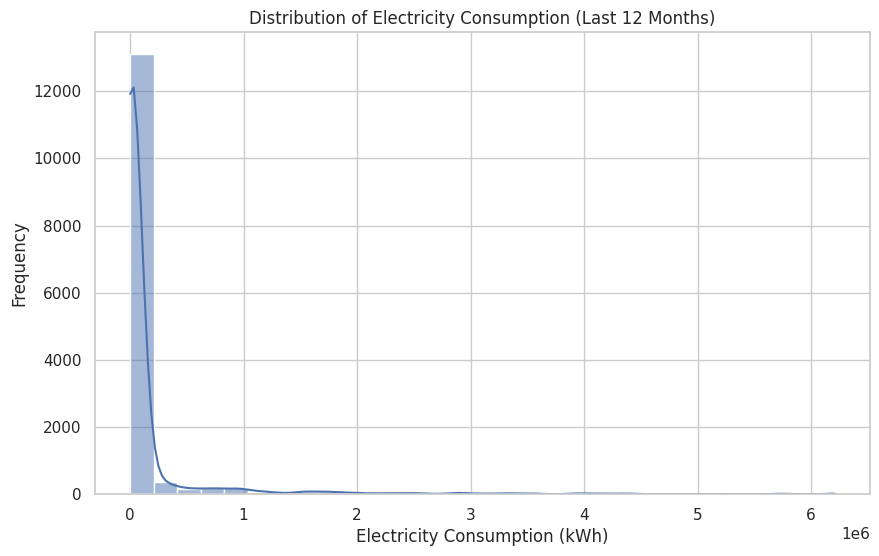

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


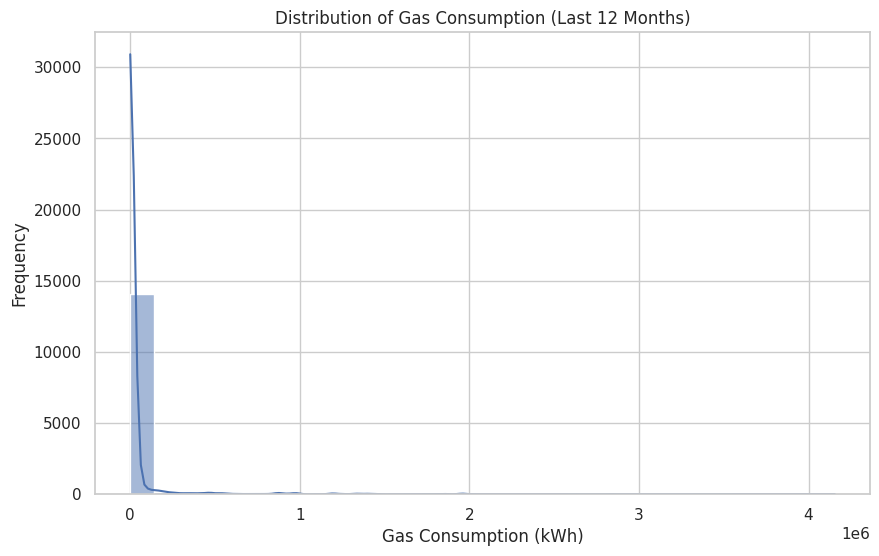

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


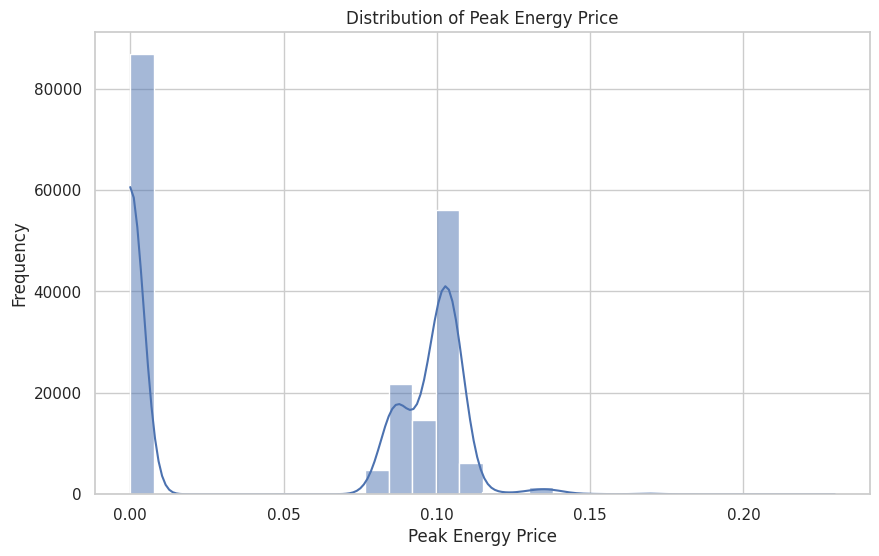

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualize distribution of electricity consumption (cons_12m) in customer data
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['cons_12m'], bins=30, kde=True)
plt.title('Distribution of Electricity Consumption (Last 12 Months)')
plt.xlabel('Electricity Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of gas consumption (cons_gas_12m) in customer data
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['cons_gas_12m'], bins=30, kde=True)
plt.title('Distribution of Gas Consumption (Last 12 Months)')
plt.xlabel('Gas Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

# Visualize pricing data distribution for peak pricing
plt.figure(figsize=(10, 6))
sns.histplot(pricing_data['price_peak_var'], bins=30, kde=True)
plt.title('Distribution of Peak Energy Price')
plt.xlabel('Peak Energy Price')
plt.ylabel('Frequency')
plt.show()


To modify the visualizations for other numerical columns or to add more plots in your exploratory data analysis (EDA), we can follow these steps:

In [6]:
# List numerical columns in customer data
numerical_columns_customer = customer_data.select_dtypes(include='number').columns.tolist()
print("Numerical Columns in Customer Data:", numerical_columns_customer)

# List numerical columns in pricing data
numerical_columns_pricing = pricing_data.select_dtypes(include='number').columns.tolist()
print("Numerical Columns in Pricing Data:", numerical_columns_pricing)


Numerical Columns in Customer Data: ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max', 'churn']
Numerical Columns in Pricing Data: ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


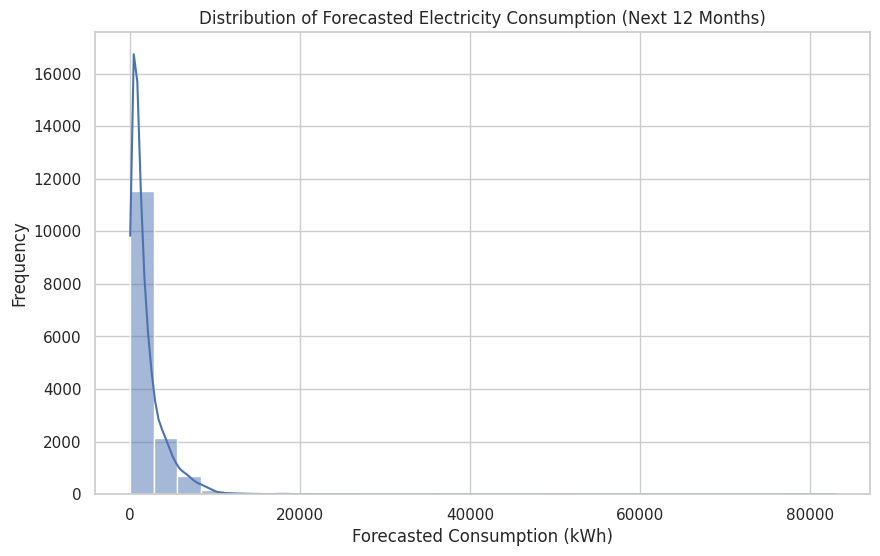

In [7]:
# Histogram for forecasted electricity consumption (next 12 months)
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['forecast_cons_12m'], bins=30, kde=True)
plt.title('Distribution of Forecasted Electricity Consumption (Next 12 Months)')
plt.xlabel('Forecasted Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()


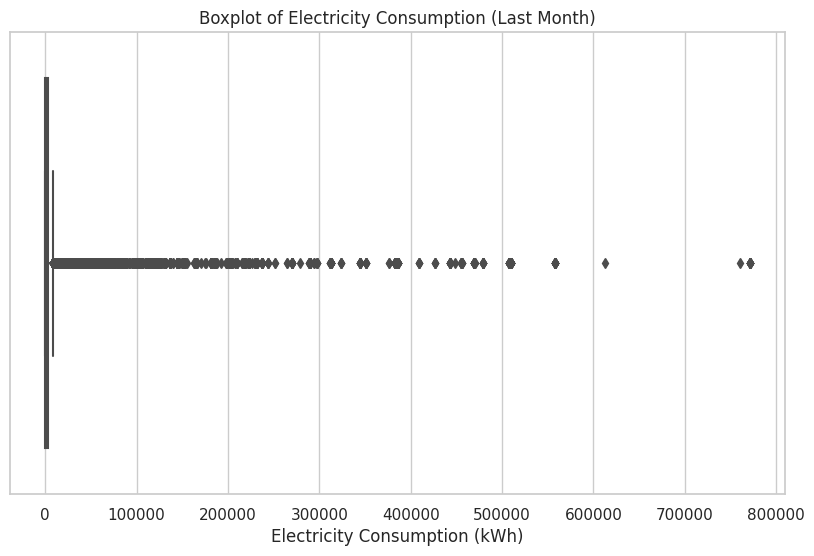

In [8]:
# Boxplot for electricity consumption (last month)
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_data['cons_last_month'])
plt.title('Boxplot of Electricity Consumption (Last Month)')
plt.xlabel('Electricity Consumption (kWh)')
plt.show()


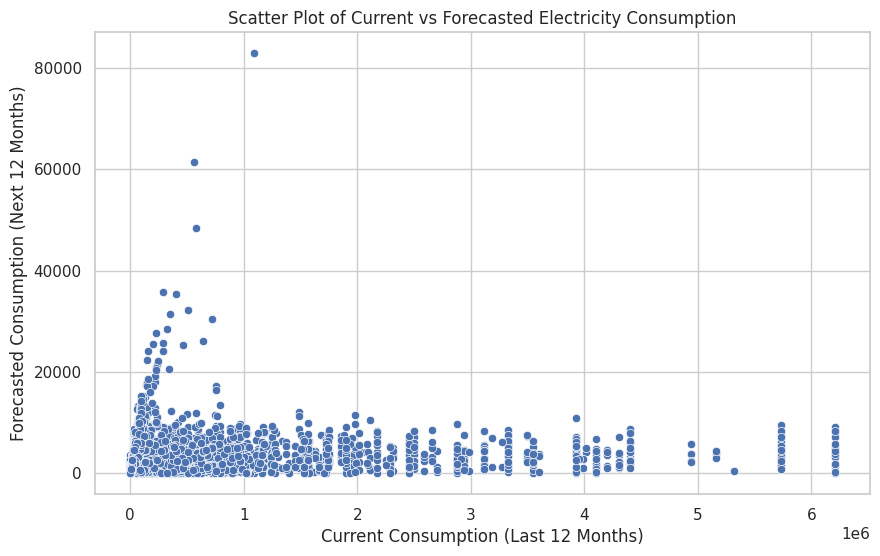

In [9]:
# Scatter plot for current vs forecasted electricity consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['cons_12m'], y=customer_data['forecast_cons_12m'])
plt.title('Scatter Plot of Current vs Forecasted Electricity Consumption')
plt.xlabel('Current Consumption (Last 12 Months)')
plt.ylabel('Forecasted Consumption (Next 12 Months)')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


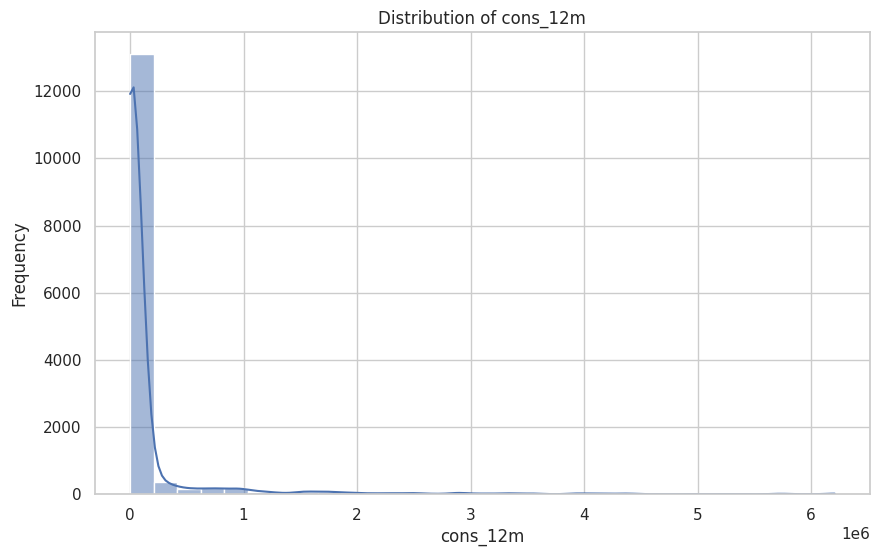

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


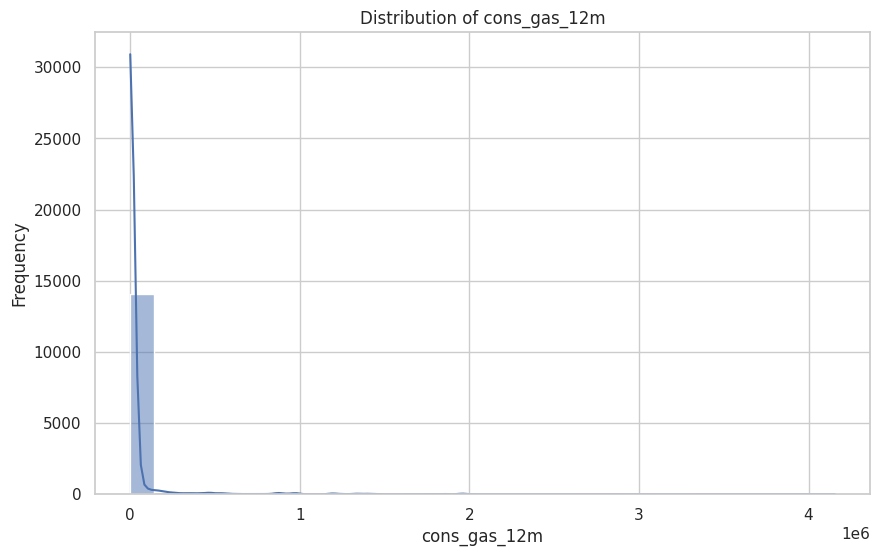

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


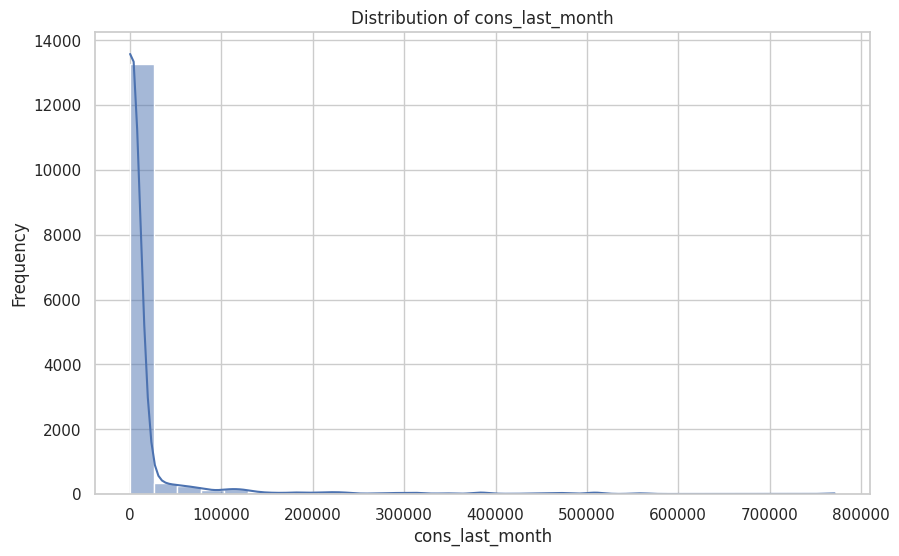

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


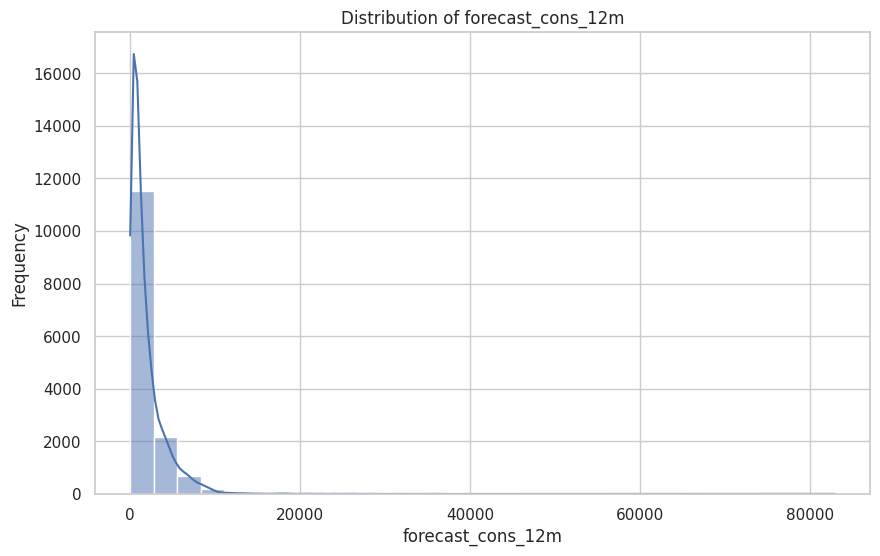

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


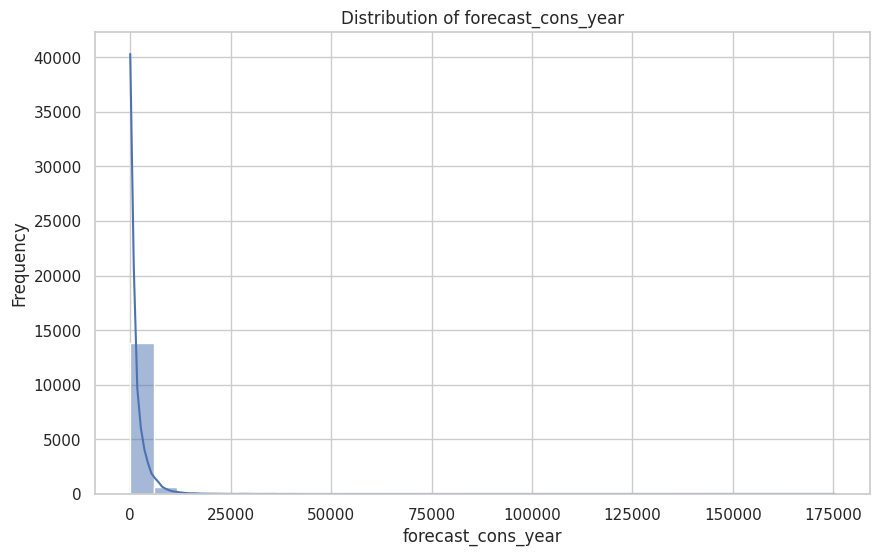

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


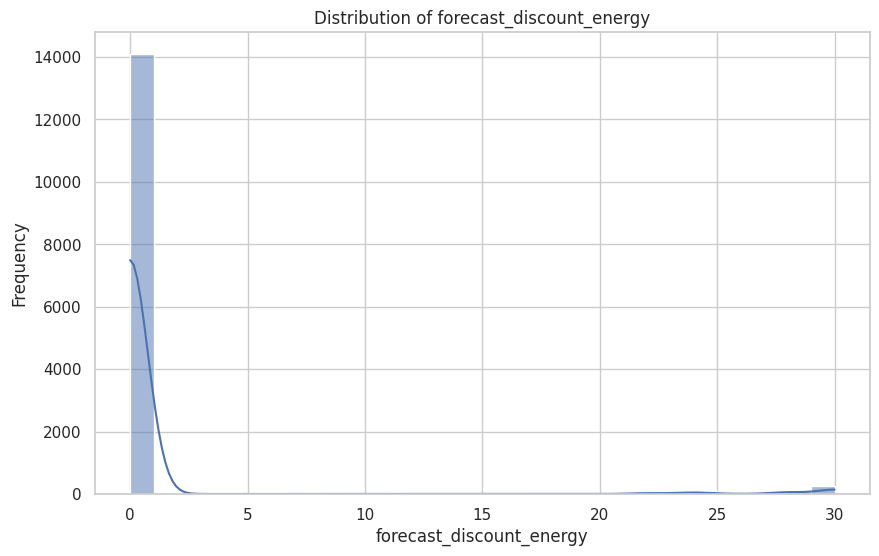

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


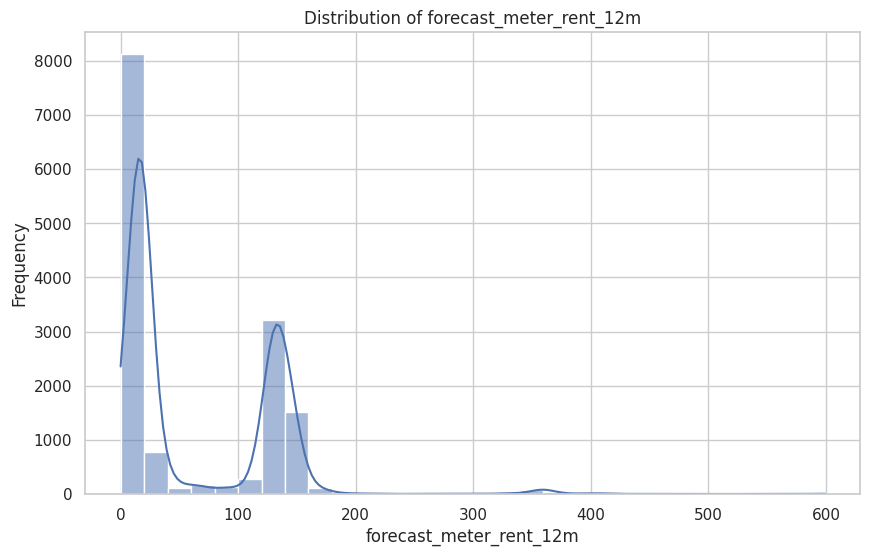

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


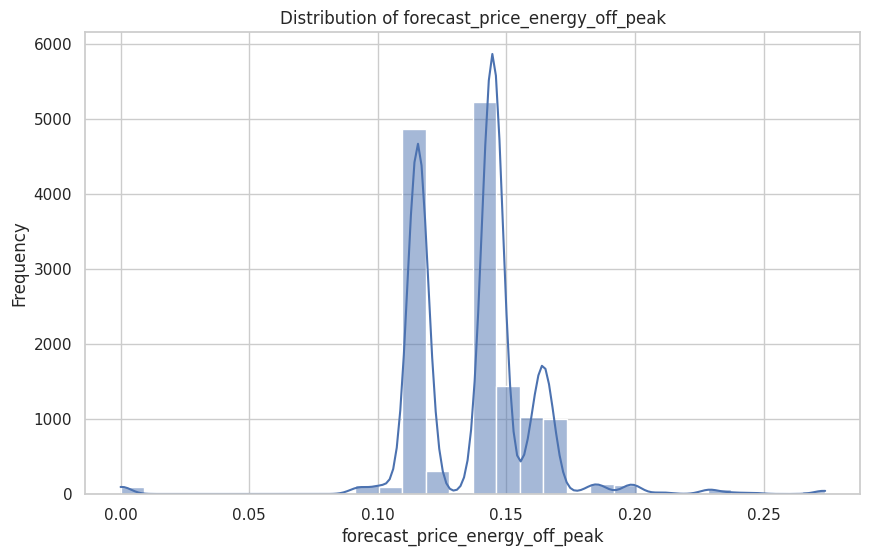

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


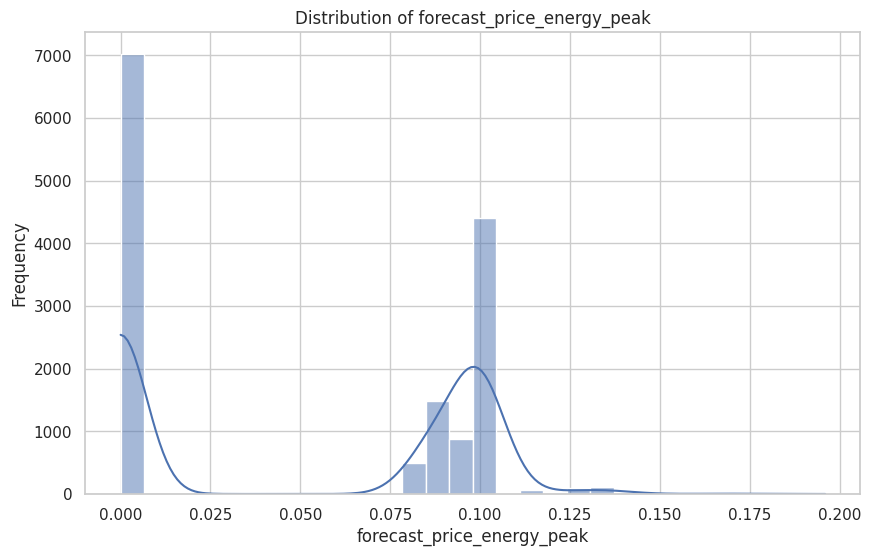

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


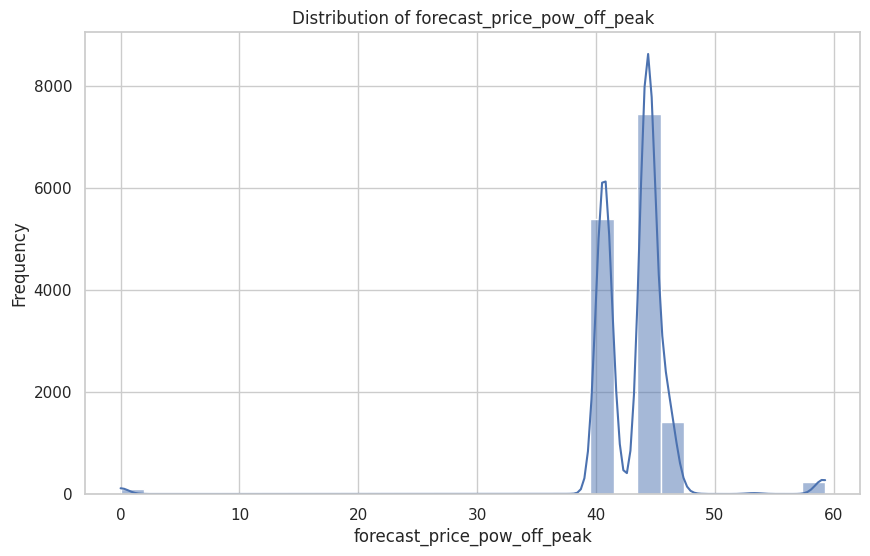

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


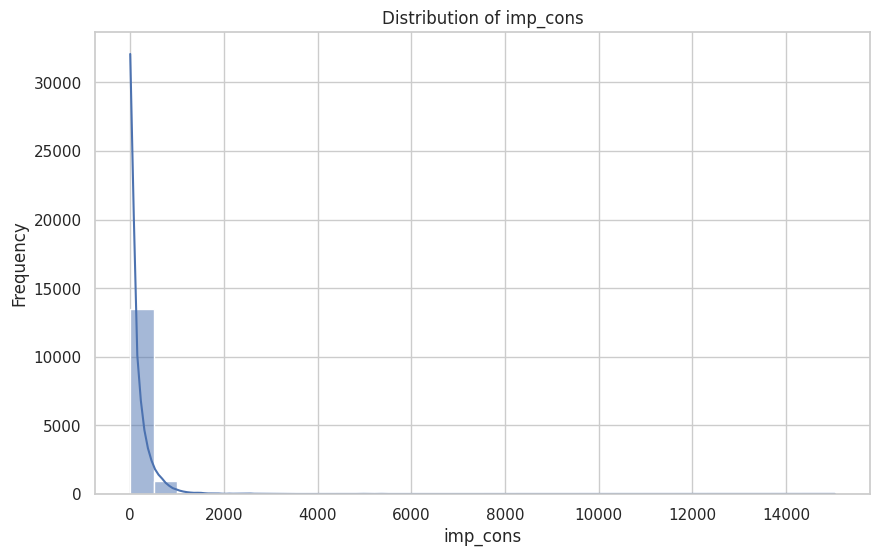

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


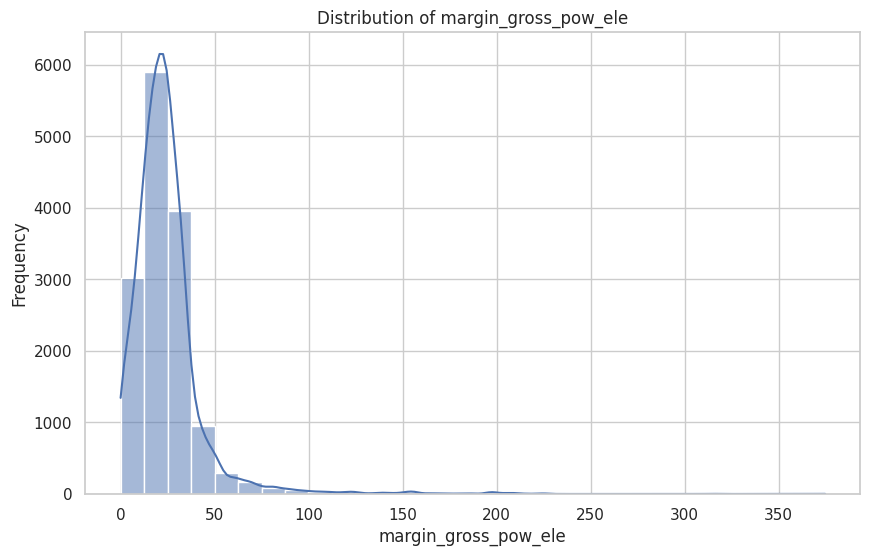

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


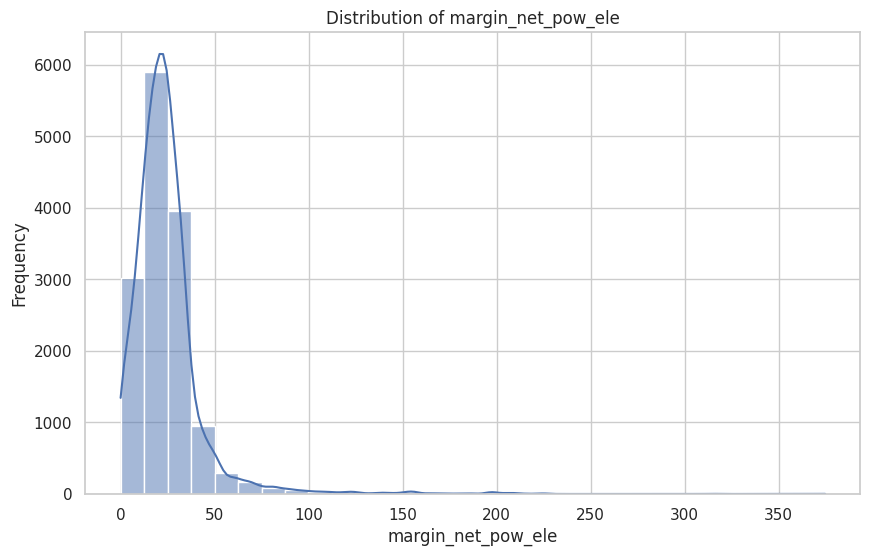

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


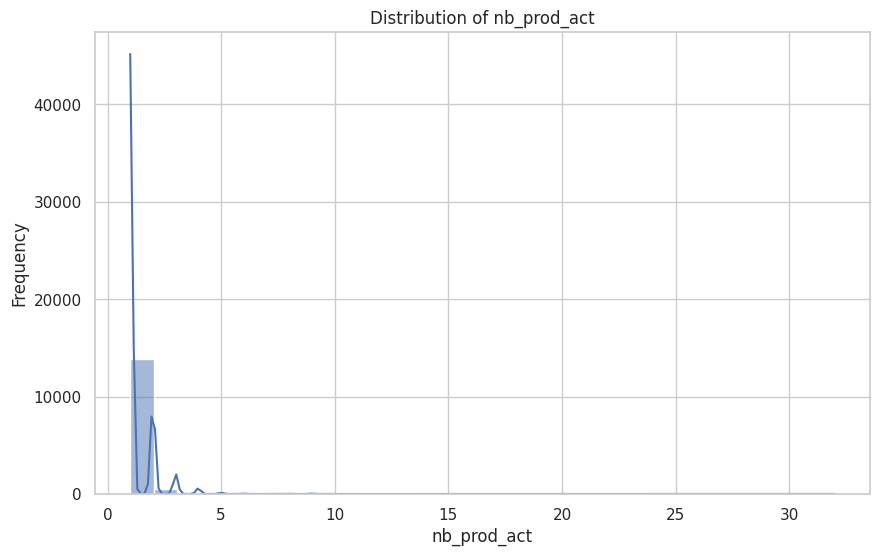

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


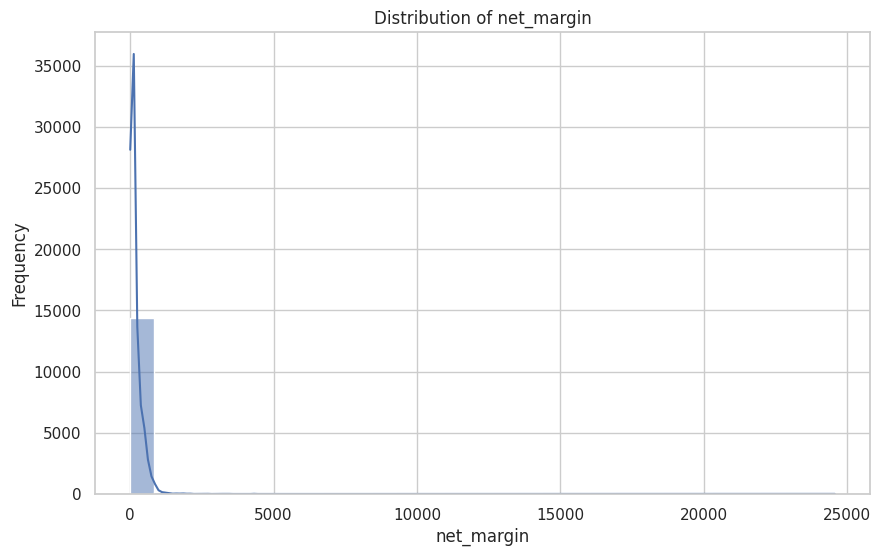

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


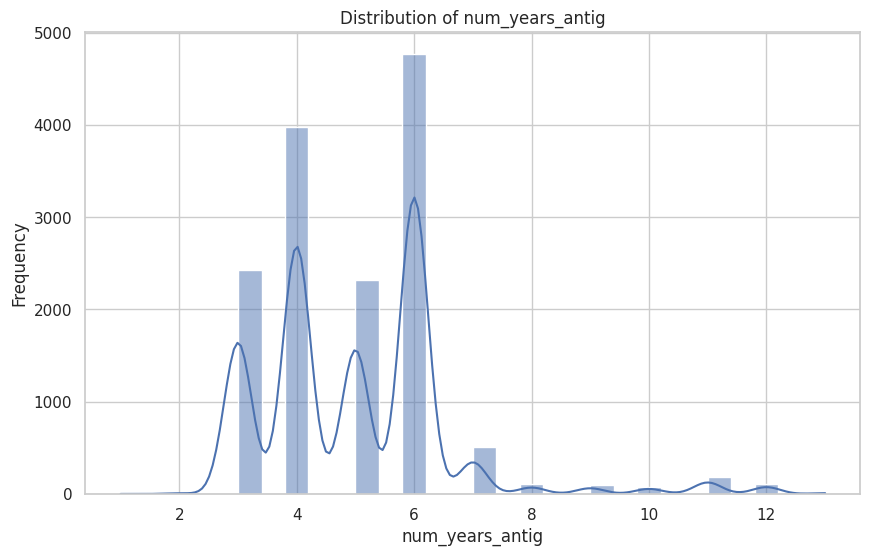

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


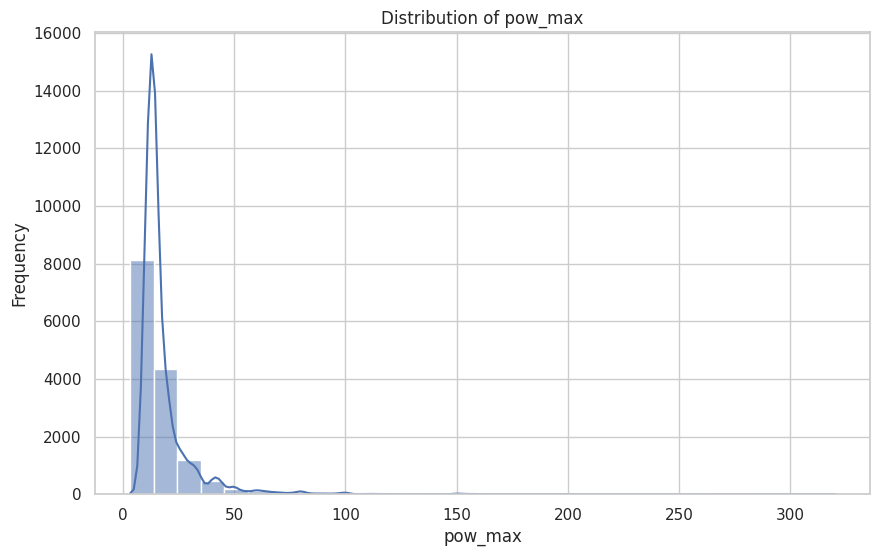

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


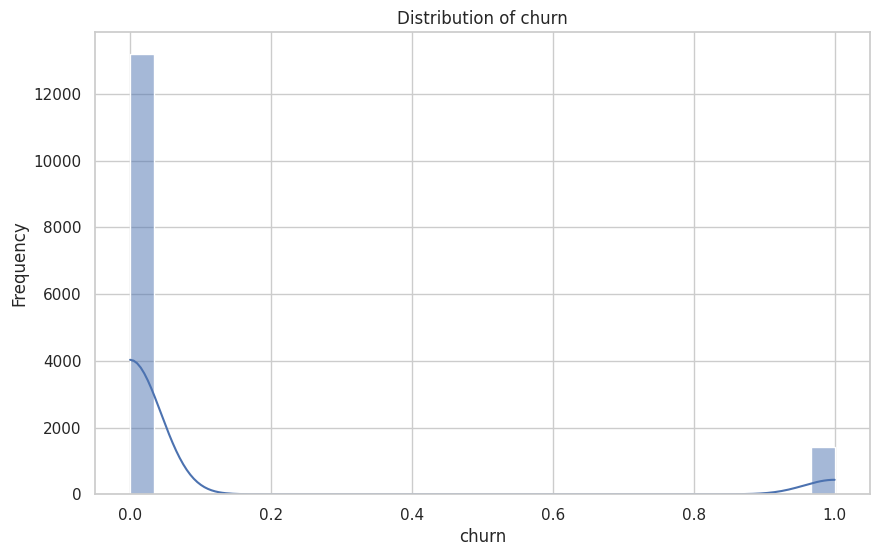

In [10]:
# Loop through numerical columns and create histograms
for column in numerical_columns_customer:
    plt.figure(figsize=(10, 6))
    sns.histplot(customer_data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
